In [38]:
wd <- getwd()
wd <- gsub('code', 'data', wd)
setwd(wd)
print(wd)

[1] "/home/alin/MyLearning/Kaggle/TwoSigma/data"


### Load data

In [39]:
packages <- c("jsonlite", "dplyr", "purrr", "tidytext", "tibble", "ggplot2", "lubridate", "stringr", "tidyr")
purrr::walk(packages, library, character.only = TRUE, warn.conflicts = FALSE)

In [40]:
data <- fromJSON("train.json")

In [41]:
names(data)

[1] "bathrooms"       "bedrooms"        "building_id"     "created"        
 [5] "description"     "display_address" "features"        "latitude"       
 [9] "listing_id"      "longitude"       "manager_id"      "photos"         
[13] "price"           "street_address"  "interest_level"

#### convert to tibble

#### we ignore photos and features for now

In [42]:
vars <- setdiff(names(data), c('photos', 'features'))

In [43]:
train_df <- map_at(data, vars, unlist) %>%
            as_tibble(.) %>%
            mutate(interest_level = factor(interest_level, c('low', 'medium', 'high')))

In [44]:
#head(train_df)

In [45]:
names(train_df)

[1] "bathrooms"       "bedrooms"        "building_id"     "created"        
 [5] "description"     "display_address" "features"        "latitude"       
 [9] "listing_id"      "longitude"       "manager_id"      "photos"         
[13] "price"           "street_address"  "interest_level"

In [46]:
class(train_df)

[1] "tbl_df"     "tbl"        "data.frame"

### Single variable exploration

In [47]:
interest_levels = levels(train_df$interest_level)

#### functions for numeric variables and "cat variables"

In [48]:
pull <- function(x,y) {
    #utility function to pull a column from a tibble as a vector
    x[,if(is.name(substitute(y))) deparse(substitute(y)) else y, drop = FALSE][[1]]
  }
        
single_num <- function(dSet, feature){
  #for numerical feature
  val<- dSet %>% pull(as.character(feature))
  print(paste("num of NA is ", sum(is.na(val))))
  print("general summary:")
  print(summary(val))
  for(lvl in interest_levels){
      print(paste("summary of ", lvl, "-interest:"))
      val <- dSet[dSet$interest_level == lvl,] %>% pull(as.character(feature))
      print(summary(val))
  }
  
}     


single_cat <- function(dSet, feature, target = "interest_level"){
    val <- dSet %>% pull(as.character(feature))
    tar <- dSet %>% pull(as.character(target))
    tab <- table(feature = val, target = tar)
    print(tab)
    print(tab/(tab[,1] + tab[, 2] + tab[, 3]))
}

#### bathrooms

In [49]:
single_num(train_df, 'bathrooms')
single_cat(train_df, 'bathrooms')

[1] "num of NA is  0"
[1] "general summary:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.000   1.212   1.000  10.000 
[1] "summary of  low -interest:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.000   1.239   1.000  10.000 
[1] "summary of  medium -interest:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.000   1.164   1.000   4.000 
[1] "summary of  high -interest:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.000   1.116   1.000   4.000 
       target
feature   low medium  high
    0     306      6     1
    1   26581   9428  3413
    1.5   605     40     0
    2    5566   1687   407
    2.5   274      3     0
    3     671     60    14
    3.5    70      0     0
    4     150      5     4
    4.5    29      0     0
    5      20      0     0
    5.5     5      0     0
    6       4      0     0
    6.5     1      0     0
    7       1      0     0
    10      1      0     0
       target


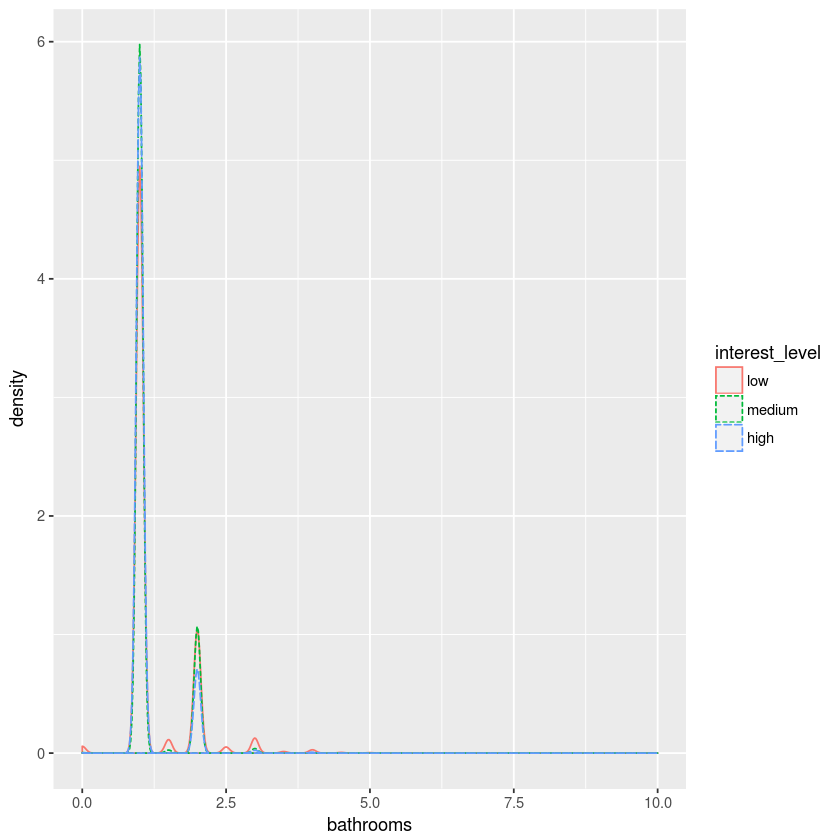

In [50]:
ggplot(data=train_df) +
  geom_density(aes(x = bathrooms,
                   color = interest_level,
                   linetype = interest_level ))

#### not much difference,  61 low interest cases have many rooms

#### bedrooms

In [51]:
single_num(train_df, 'bedrooms')
single_cat(train_df, 'bedrooms')

[1] "num of NA is  0"
[1] "general summary:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.000   1.542   2.000   8.000 
[1] "summary of  low -interest:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.000   1.515   2.000   8.000 
[1] "summary of  medium -interest:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   1.622   2.000   7.000 
[1] "summary of  high -interest:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   1.546   2.000   5.000 
       target
feature   low medium  high
      0  6518   2110   847
      1 11715   3094   943
      2  9801   3516  1306
      3  4727   1957   592
      4  1233    547   149
      5   243      2     2
      6    44      2     0
      7     1      1     0
      8     2      0     0
       target
feature         low      medium        high
      0 0.687915567 0.222691293 0.089393140
      1 0.743715084 0.196419502 0.059865414
      2 0.670245504 0.24044313

#### created

extract year/month/day from created

In [52]:
train_df$year <- year(train_df$created)
train_df$month <- month(train_df$created)
train_df$day <- day(train_df$created)

In [53]:
print("year distribution:")
print(table(train_df$year))
print("month distribution:")
print(table(train_df$month))
print("day distribution:")
print(table(train_df$day))

[1] "year distribution:"

 2016 
49352 
[1] "month distribution:"

    4     5     6 
16411 15797 17144 
[1] "day distribution:"

   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 894 1783 1803 1493 1808 1851 1764 1655 1514 1603 1702 2348 1736 1951 1701 1891 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
1615 1483 1412 1762 2475 1669 1049 1862 1458 1470 1588 1644 1641  721    6 


#### year is useless, may consider grouping days as beginning / middle / end of a month?

In [54]:
day_by_10 <- function(day){
    floor((min(30, day) - 1) / 10)
}
train_df$ten_day <- unlist(map(train_df$day, day_by_10))

In [55]:
single_cat(train_df, 'ten_day')

       target
feature   low medium  high
      0 10886   3877  1405
      1 12279   3927  1395
      2 11119   3425  1039
       target
feature        low     medium       high
      0 0.67330529 0.23979466 0.08690005
      1 0.69763082 0.22311232 0.07925686
      2 0.71353398 0.21979080 0.06667522


#### Nope, not much difference

In [56]:
single_cat(train_df, 'month')

       target
feature   low medium  high
      4 11360   3777  1274
      5 10923   3640  1234
      6 12001   3812  1331
       target
feature        low     medium       high
      4 0.69221863 0.23015051 0.07763086
      5 0.69146040 0.23042350 0.07811610
      6 0.70001167 0.22235184 0.07763649


#### not much difference

#### description

#### For quick development we just take a subset.

In [57]:
train0 <- train_df[1:500, c('listing_id', 'description')]

#### define a function to remove some obvious unwanted stuff such as email, phone number, web-reacted,  etc.

In [58]:
dejunk <- function(a){
  a <- gsub('<a\\s+website_redacted', '',a)
  a <- gsub('<\\S+\\s*/*>', ' ', a)
  a <- gsub('\\S+\\s*@\\s*\\S+', ' ', a)
  a <- gsub('\\d+[-]*\\d+[-]\\d+', ' ', a)
  a <- gsub('\\W+', ' ', a)
  a <- gsub('[[:digit:]]', ' ', a)
}


In [59]:
train0$description_tr <- unlist(train0 %>% 
                                select(description) %>% 
                                map(dejunk)
                               )

In [68]:
train0[1:3, 'description']

description
"Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !<br /><br />Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing!<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><p><a website_redacted"
"BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind yourself and your home in the center of it all. Steps from Grand Central Station, at the epicenter of Manhattan, The Centra combines convenience and luxury to create a perfectly balanced living experience. Offering newly renovated over sized apartment layouts.<br /><br />Full Time DoormanElevatorNewly Renovated HallwaysLaundry in BuildingOn-Site Parking Garage<br /><br />I operate with the utmost care and integrity. The client is my #1 priority. Contact me for a viewing of the great apartment, I'm more than confident we'll find a place for you to call home.Call/Text Keon: Email: If you require a move within 30 days write ""URGENT"" in the subject email or text message to be taken with high priority.<br /><br />One Month Free - net effective rent listed<p><a website_redacted"
"**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**Looking for the perfect apartment in Midtown East - Sutton Place? Come check out the beautiful apartment in this prime location! **Mid 50's and 1st Ave** Elevator Building with 24-hour doorman, laundry room, and bike room!LARGE living space with King Bedroom!Beautiful large kitchen with stainless steel appliances including dishwasher! Stunning modern bathroom! Ample amount of closet space throughout entire apartment, and enough space to fit everything you need and more! Apartment is in short distance to all shops, restaurants, and public transportation (E,M, 6 Trains). Don't miss out on this great apartment so act quick! Call/Text Edan (855-650-2204 to schedule a private viewing today!<br /><br /><br /><br /><br /><br /><p><a website_redacted"


In [69]:
train0[1:3, 'description_tr']

description_tr
Spacious Bedroom Bathroom in Williamsburg Apartment Features Renovated Eat in Kitchen With Dishwasher Renovated Bathroom Beautiful Hardwood Floors Lots of Sunlight Great Closet Space Freshly Painted Heat and Hot Water Included Live in Super Nearby L J M G Trains Contact Information Kenneth BeakExclusive AgentC Email Text or Email to schedule a private viewing
BRAND NEW GUT RENOVATED TRUE BEDROOMFind yourself and your home in the center of it all Steps from Grand Central Station at the epicenter of Manhattan The Centra combines convenience and luxury to create a perfectly balanced living experience Offering newly renovated over sized apartment layouts Full Time DoormanElevatorNewly Renovated HallwaysLaundry in BuildingOn Site Parking Garage I operate with the utmost care and integrity The client is my priority Contact me for a viewing of the great apartment I m more than confident we ll find a place for you to call home Call Text Keon Email If you require a move within days write URGENT in the subject email or text message to be taken with high priority One Month Free net effective rent listed
FLEX BEDROOM WITH FULL PRESSURIZED WALL Looking for the perfect apartment in Midtown East Sutton Place Come check out the beautiful apartment in this prime location Mid s and st Ave Elevator Building with hour doorman laundry room and bike room LARGE living space with King Bedroom Beautiful large kitchen with stainless steel appliances including dishwasher Stunning modern bathroom Ample amount of closet space throughout entire apartment and enough space to fit everything you need and more Apartment is in short distance to all shops restaurants and public transportation E M Trains Don t miss out on this great apartment so act quick Call Text Edan to schedule a private viewing today


In [70]:
train0$description <- NULL

#### convert to tidy text for getting word count and sentiment

In [71]:
tidy_train0 <- train0 %>%
    unnest_tokens(word, description_tr) %>%
    anti_join(stop_words)

Joining, by = "word"


#### word count

In [73]:
word_cnt <- tidy_train0 %>% 
  count(listing_id) %>%
  mutate(word_cnt = n)

In [77]:
train0a <- train0 %>%
    left_join(word_cnt)

Joining, by = "listing_id"


In [79]:
#head(train0a)

#### sentiment

In [80]:
senti <- tidy_train0 %>%
  inner_join(get_sentiments("bing")) %>%
  count(listing_id, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative)


Joining, by = "word"


In [81]:
head(senti)

listing_id,negative,positive,sentiment
7087774,0,1,1
7087981,0,7,7
7088015,0,10,10
7088124,0,1,1
7088531,1,1,0
7088568,1,4,3


In [82]:
train0b <- train0a %>%
  left_join(senti) %>%
  select(listing_id, word_cnt, sentiment)

Joining, by = "listing_id"


#### Features